In [16]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

from matplotlib import rc
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

loaded = np.load("../results/LR.npz")

x = loaded["x"]
loss_full_label_list = loaded["loss_full_label_list"]
loss_random_list = loaded["loss_random_list"]
loss_fs_inference_list = loaded["loss_fs_inference_list"]
loss_fs_estimate_list = loaded["loss_fs_estimate_list"]

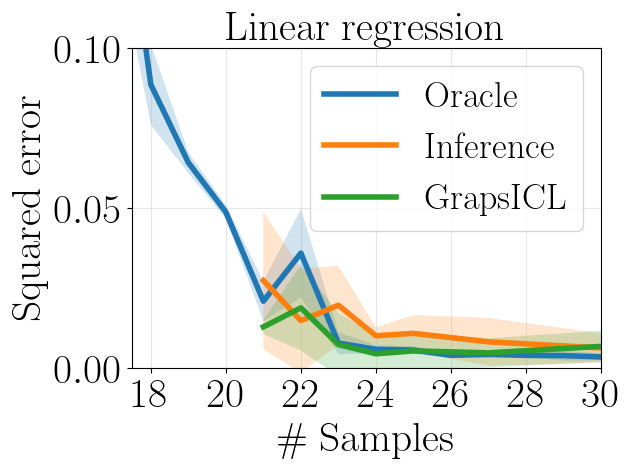

In [20]:
import matplotlib.ticker as ticker

n_total = 41
x_full = np.arange(n_total)
plt.plot(x_full, np.mean(loss_full_label_list, axis=0), lw=4, label=r'$\mathrm{Oracle}$')
plt.fill_between(x_full, np.mean(loss_full_label_list, axis=0)-np.std(loss_full_label_list, axis=0), np.mean(loss_full_label_list, axis=0)+np.std(loss_full_label_list, axis=0), alpha=0.2)


set_size_list = [1,2,3,4,5,7,10]
n_labeled = 20


#plt.plot(x, np.mean(loss_random_list, axis=0), lw=2, label="random")
#plt.fill_between(x, np.mean(loss_random_list, axis=0)-np.std(loss_random_list, axis=0), np.mean(loss_random_list, axis=0)+np.std(loss_random_list, axis=0), alpha=0.2)

plt.plot(x, np.mean(loss_fs_inference_list, axis=0), lw=4, label=r"$\mathrm{Inference}$")
plt.fill_between(x, np.mean(loss_fs_inference_list, axis=0)-np.std(loss_fs_inference_list, axis=0), np.mean(loss_fs_inference_list, axis=0)+np.std(loss_fs_inference_list, axis=0), alpha=0.2)
plt.plot(x, np.mean(loss_fs_estimate_list, axis=0), lw=4, label=r"$\mathrm{GrapsICL}$")
plt.fill_between(x, np.mean(loss_fs_estimate_list, axis=0)-np.std(loss_fs_estimate_list, axis=0), np.mean(loss_fs_estimate_list, axis=0)+np.std(loss_fs_estimate_list, axis=0), alpha=0.2)

plt.Figure(figsize=(5, 4))

plt.xticks(fontsize=30)
plt.yticks([0, 0.05, 0.1], fontsize=30)
plt.xlim(17.5, 30)
plt.ylim(0, 0.1)

plt.legend(fontsize=26)

plt.title(r'$\mathrm{Linear~regression}$', fontsize=30)
plt.xlabel(r'$\mathrm{\#~Samples}$', fontsize=30)
plt.ylabel(r'$\mathrm{Squared~error}$', fontsize=30)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("./plot_lr.pdf", format="pdf", dpi=1200)
plt.show()